## Name :- Chetan D. Wargantiwar
# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# To see whole data on screen.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.6f}'.format 

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

import re

In [2]:
 # Importing dataset

df = pd.read_csv('C:/Users/lappy/Desktop/Advance Regression/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Pre Checks on Dataframe

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To check how many rows have all missing values
print("Total rows with no single values in it :", df.isnull().all(axis=1).sum())

Total rows with no single values in it : 0


In [6]:
# To check how many columns have all missing values
print("Total columns with no single values in it: ", df.isnull().all(axis=0).sum())

Total columns with no single values in it:  0


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Checking & Rectifying problems with Null Values 

In [8]:
# defining function for calculation of null values and 
# their percentage level in the descending order.
def nan_counter(df):
    
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total null', 'Percent'])
    
    print(missing_data)

# using defined function.
nan_counter(df)

               Total null   Percent
PoolQC               1453 99.520548
MiscFeature          1406 96.301370
Alley                1369 93.767123
Fence                1179 80.753425
FireplaceQu           690 47.260274
LotFrontage           259 17.739726
GarageYrBlt            81  5.547945
GarageCond             81  5.547945
GarageType             81  5.547945
GarageFinish           81  5.547945
GarageQual             81  5.547945
BsmtFinType2           38  2.602740
BsmtExposure           38  2.602740
BsmtQual               37  2.534247
BsmtCond               37  2.534247
BsmtFinType1           37  2.534247
MasVnrArea              8  0.547945
MasVnrType              8  0.547945
Electrical              1  0.068493
Id                      0  0.000000
Functional              0  0.000000
Fireplaces              0  0.000000
KitchenQual             0  0.000000
KitchenAbvGr            0  0.000000
BedroomAbvGr            0  0.000000
HalfBath                0  0.000000
FullBath                0  0

In [9]:
# Dropping Columns with more than 15 % missing values
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df.drop(["Id"], axis=1, inplace=True)
nan_counter(df)

               Total null   Percent
LotFrontage           259 17.739726
GarageType             81  5.547945
GarageYrBlt            81  5.547945
GarageFinish           81  5.547945
GarageQual             81  5.547945
GarageCond             81  5.547945
BsmtFinType2           38  2.602740
BsmtExposure           38  2.602740
BsmtQual               37  2.534247
BsmtCond               37  2.534247
BsmtFinType1           37  2.534247
MasVnrArea              8  0.547945
MasVnrType              8  0.547945
Electrical              1  0.068493
KitchenAbvGr            0  0.000000
BedroomAbvGr            0  0.000000
HalfBath                0  0.000000
FullBath                0  0.000000
BsmtHalfBath            0  0.000000
BsmtFullBath            0  0.000000
KitchenQual             0  0.000000
GrLivArea               0  0.000000
TotRmsAbvGrd            0  0.000000
Functional              0  0.000000
MSSubClass              0  0.000000
Fireplaces              0  0.000000
ScreenPorch             0  0

In [10]:
df.shape

(1460, 75)

In [11]:
# check for null values in all categorical columns

# to see only those columns which have null values in it.
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [12]:
# Replace NA with None in the following columns below : 

for col in ( 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' ):
    
    df[col]=df[col].fillna('None')

In [13]:
# check the null values in the numerical data

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [15]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
df.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(df.shape)

(1370, 75)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1370 non-null   int64  
 1   MSZoning       1370 non-null   object 
 2   LotFrontage    1370 non-null   float64
 3   LotArea        1370 non-null   int64  
 4   Street         1370 non-null   object 
 5   LotShape       1370 non-null   object 
 6   LandContour    1370 non-null   object 
 7   Utilities      1370 non-null   object 
 8   LotConfig      1370 non-null   object 
 9   LandSlope      1370 non-null   object 
 10  Neighborhood   1370 non-null   object 
 11  Condition1     1370 non-null   object 
 12  Condition2     1370 non-null   object 
 13  BldgType       1370 non-null   object 
 14  HouseStyle     1370 non-null   object 
 15  OverallQual    1370 non-null   int64  
 16  OverallCond    1370 non-null   int64  
 17  YearBuilt      1370 non-null   int64  
 18  YearRemo

In [17]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt, "YrSold") to take of years  (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) and today
df['DiffYearBuilt1'] = pd.datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd1'] = pd.datetime.now().year - df['YearRemodAdd']
df['DiffGarageYrBlt1'] = pd.datetime.now().year - df['GarageYrBlt']
df["DiffYrSold"] = pd.datetime.now().year - df['YrSold']

In [18]:
df.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DiffYearBuilt1,DiffYearRemodAdd1,DiffGarageYrBlt1,DiffYrSold
0,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,19,19,19.000000,14
1,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,46,46,46.000000,15
2,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,21,20,21.000000,14
3,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,107,52,24.000000,16
4,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,22,22,22.000000,14
5,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,29,27,29.000000,13
6,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000,18,17,18.000000,15
7,60,RL,69.000000,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000,49,49,49.000000,13
8,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900,91,72,91.000000,14
9,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Ar

In [19]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df['DiffYearBuilt'] = df['DiffYearBuilt1'] -  df["DiffYrSold"]
df['DiffYearRemodAdd'] = df['DiffYearRemodAdd1'] - df["DiffYrSold"]
df['DiffGarageYrBlt'] =  df['DiffGarageYrBlt1'] - df["DiffYrSold"]

In [20]:
df.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DiffYearBuilt1,DiffYearRemodAdd1,DiffGarageYrBlt1,DiffYrSold,DiffYearBuilt,DiffYearRemodAdd,DiffGarageYrBlt
0,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,19,19,19.000000,14,5,5,5.000000
1,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,46,46,46.000000,15,31,31,31.000000
2,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,21,20,21.000000,14,7,6,7.000000
3,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,107,52,24.000000,16,91,36,8.000000
4,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,22,22,22.000000,14,8,8,8.000000
5,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,29,27,29.000000,13,16,14,16.000000
6,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000,18,17,18.000000,15,3,2,3.000000
7,60,RL,69.000000,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000,49,49,49.000000,13,36,36,36.000000
8,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,D

In [21]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,DiffYearBuilt1,DiffYearRemodAdd1,DiffGarageYrBlt1,DiffYrSold,DiffYearBuilt,DiffYearRemodAdd,DiffGarageYrBlt
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,56.054745,70.359854,10687.435036,6.181752,5.582482,1972.783942,1985.327007,109.076642,454.211679,48.418248,570.742336,1073.372263,1176.086131,353.202190,4.162044,1533.450365,0.429197,0.059124,1.577372,0.394161,2.865693,1.037956,6.551825,0.641606,1978.353285,1.869343,500.462774,97.656204,47.028467,21.031387,3.633577,16.050365,2.940146,43.170803,6.331387,2007.811679,185194.797080,49.216058,36.672993,43.646715,14.188321,35.027737,22.484672,29.458394
std,41.073531,21.958584,10228.507006,1.344236,1.081480,29.371056,20.452934,184.589326,458.985739,164.817484,444.050989,435.558797,385.381717,439.497524,40.260837,519.489200,0.513963,0.239019,0.547455,0.502116,0.782985,0.194944,1.590884,0.644711,24.685798,0.631307,185.988074,126.805998,64.995049,60.519492,30.252215,57.422820,41.470515,503.247977,2.693166,1.331589,78899.705642,29.371056,20.452934,24.685798,1.331589,29.411577,20.443765,24.723956
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000,12.000000,12.000000,12.000000,12.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7731.000000,5.000000,5.000000,1955.000000,1967.250000,0.000000,0.000000,0.000000,225.500000,808.500000,894.000000,0.000000,0.000000,1152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,133925.000000,21.000000,18.000000,20.000000,13.000000,7.000000,4.000000,6.250000
50%,50.000000,69.000000,9591.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,399.500000,0.000000,477.500000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167000.000000,47.000000,28.000000,42.500000,14.000000,33.000000,14.000000,28.000000
75%,70.000000,79.000000,11712.750000,7.000000,6.000000,2001.000000,2004.000000,171.750000,728.000000,0.000000,811.000000,1314.000000,1414.000000,737.000000,0.000000,1788.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,582.750000,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217875.000000,67.000000,54.750000,61.000000,15.000000,53.000000,40.000000,47.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,14

In [22]:
df.shape

(1370, 82)

In [23]:
df.drop(['DiffYearBuilt1','DiffYearRemodAdd1','DiffGarageYrBlt1',
         'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1, inplace= True)

In [24]:
df.shape

(1370, 75)

In [25]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'DiffY

In [26]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# OUTCOME COLUMN:
out_col = 'SalePrice'

# NUMERICAL COLUMNS: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(num_col))

# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',df[col].unique())

30
42
MSSubClass  :  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 

# EDA

In [27]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df[[col_i,col_o]])

In [28]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df[[col_i,col_o]], order=my_order.index)

### NUMERICAL COLUMN ANALYSIS

<Figure size 432x288 with 0 Axes>

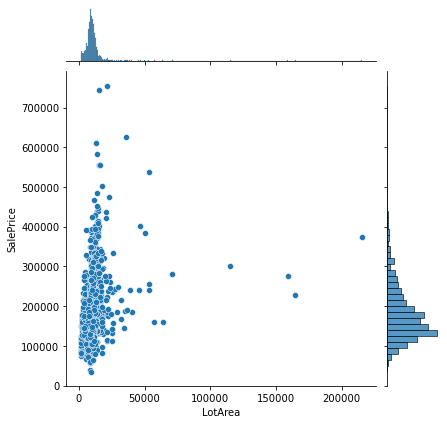

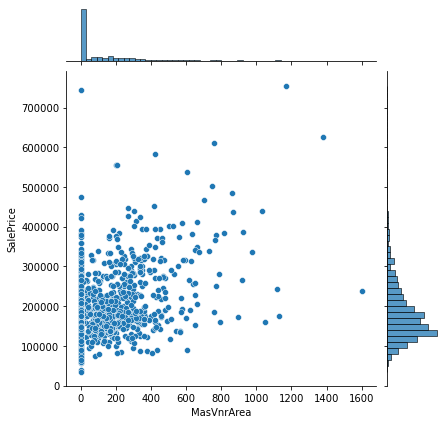

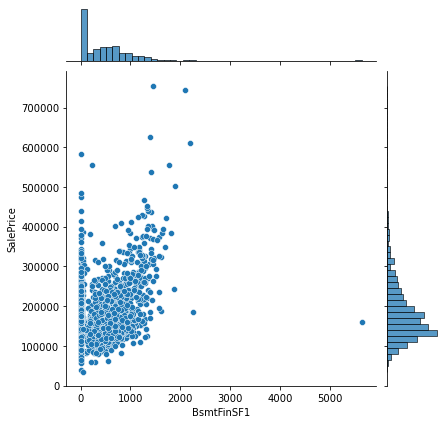

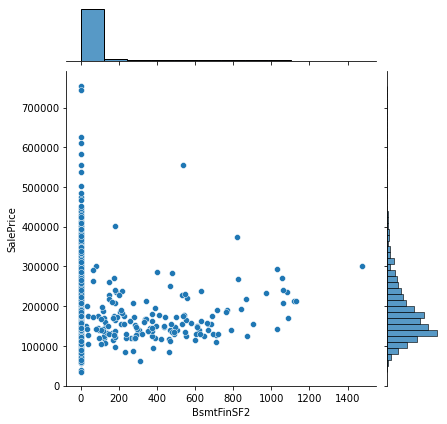

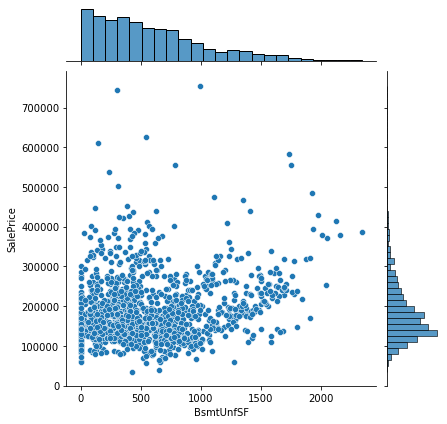

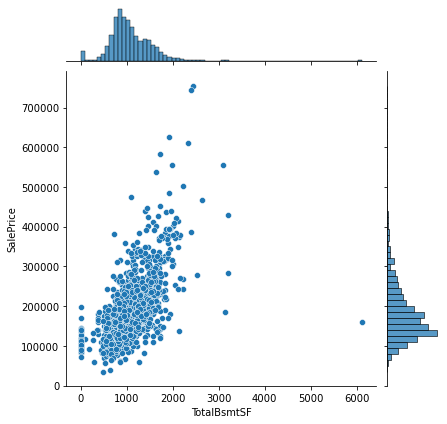

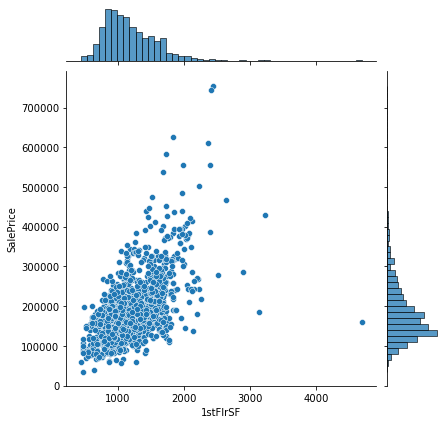

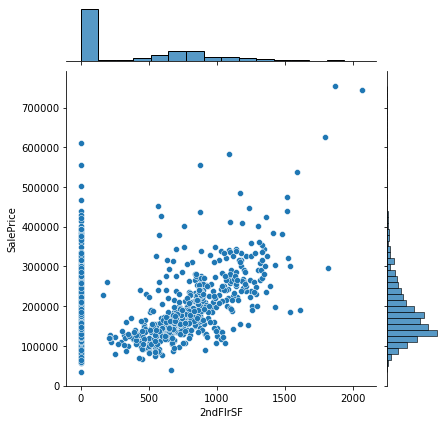

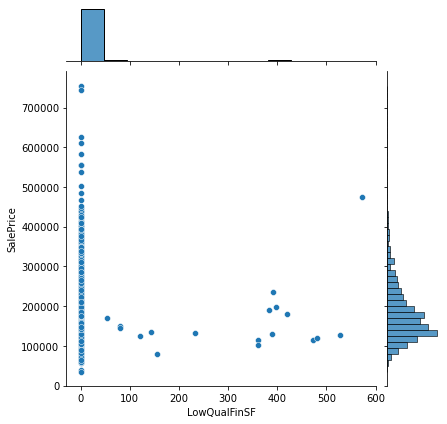

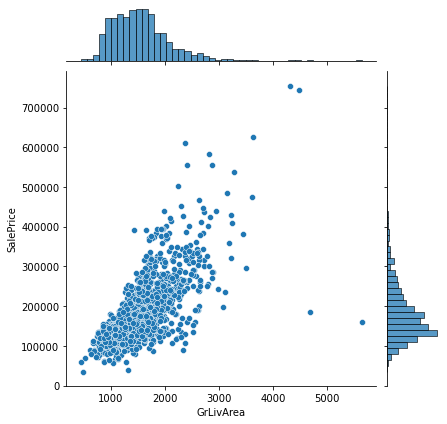

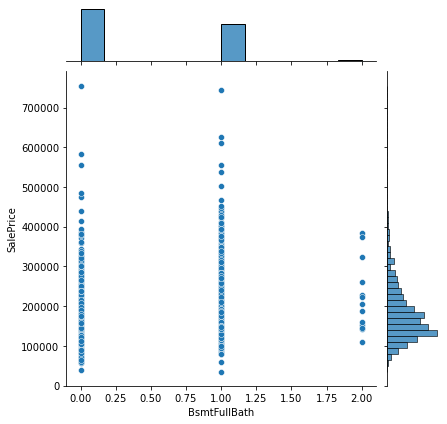

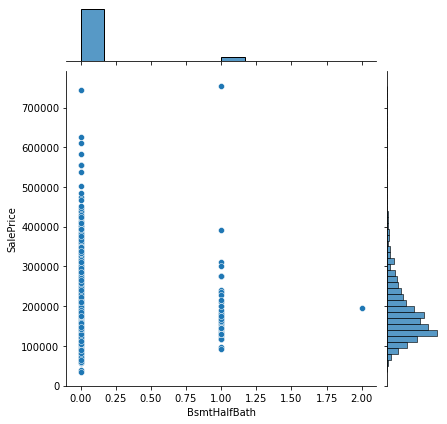

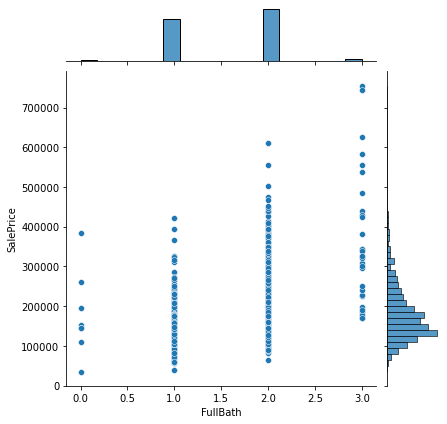

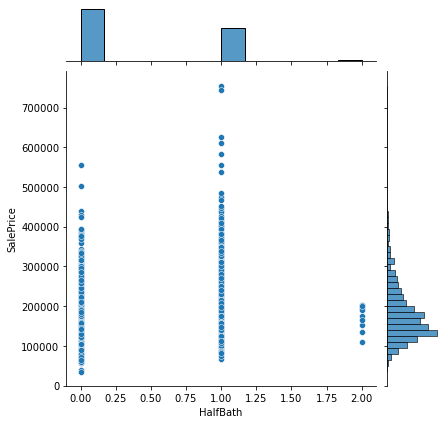

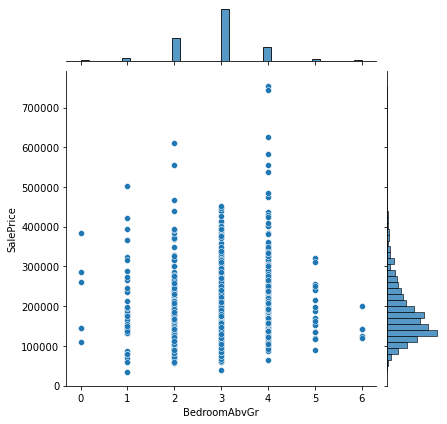

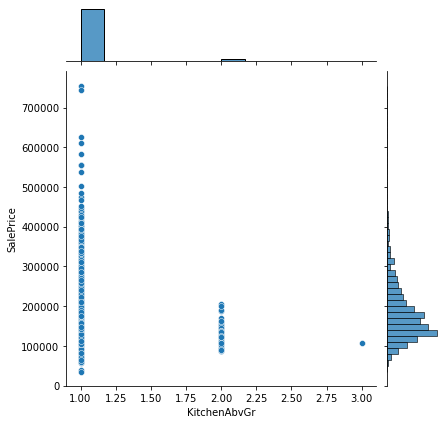

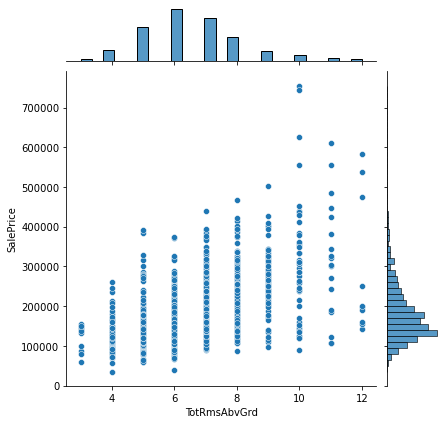

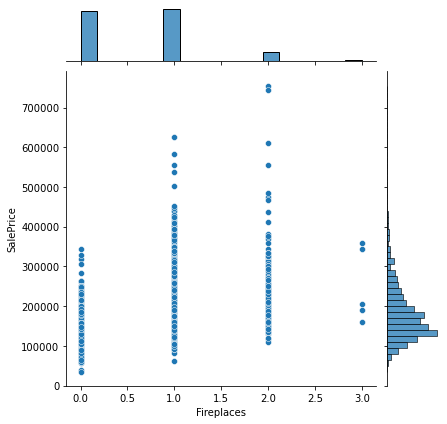

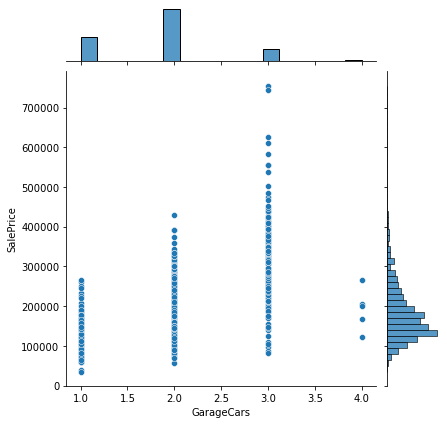

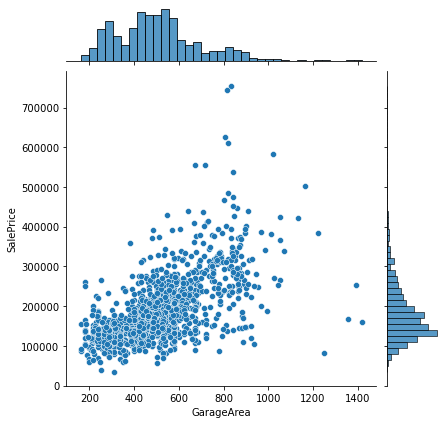

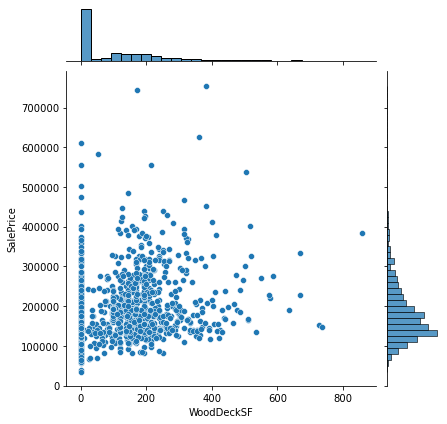

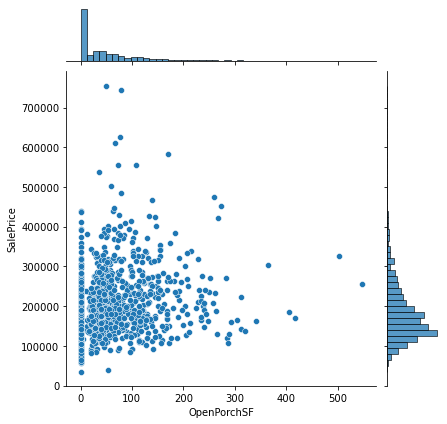

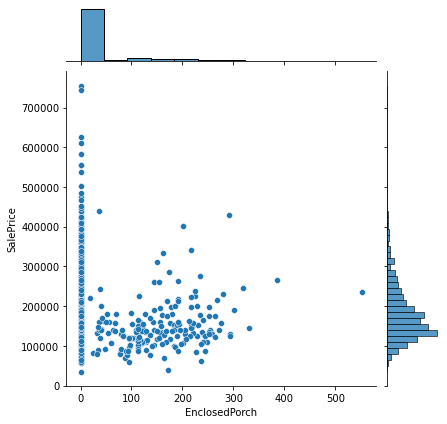

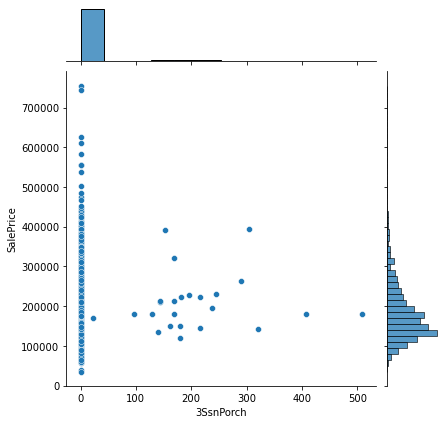

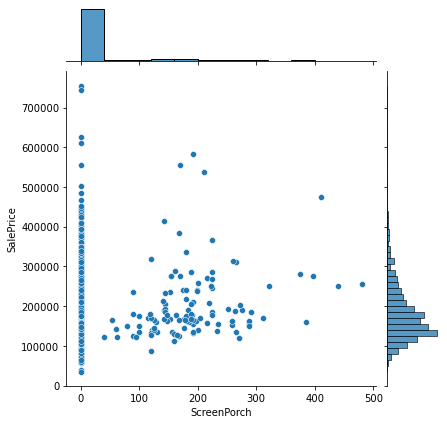

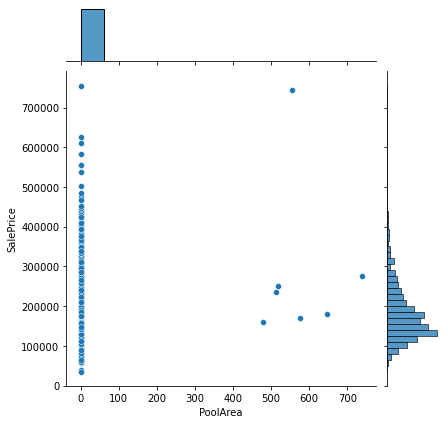

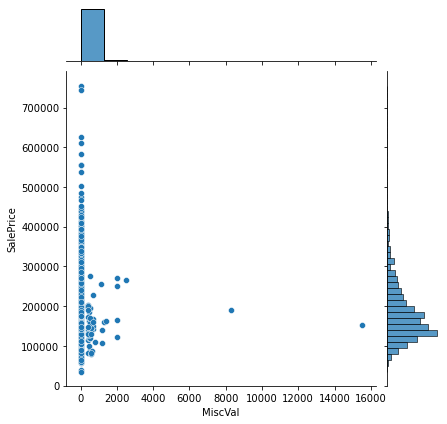

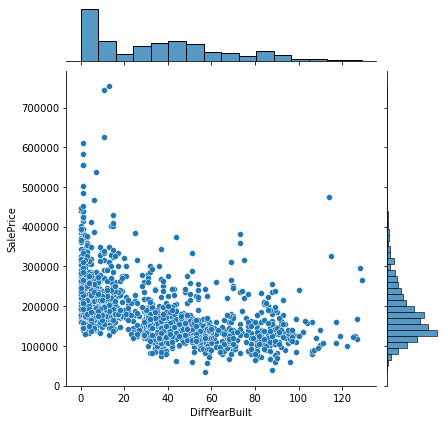

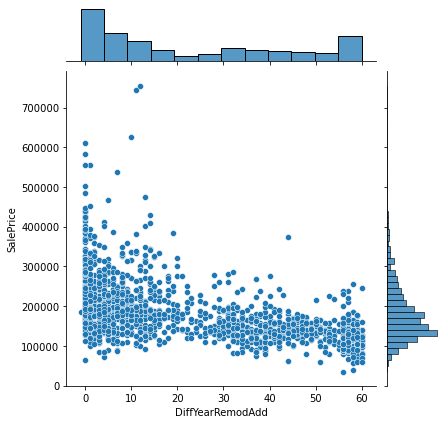

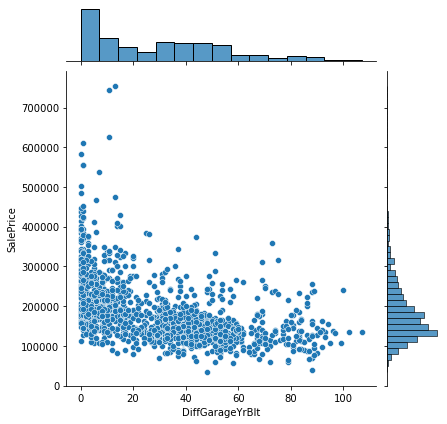

In [29]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)

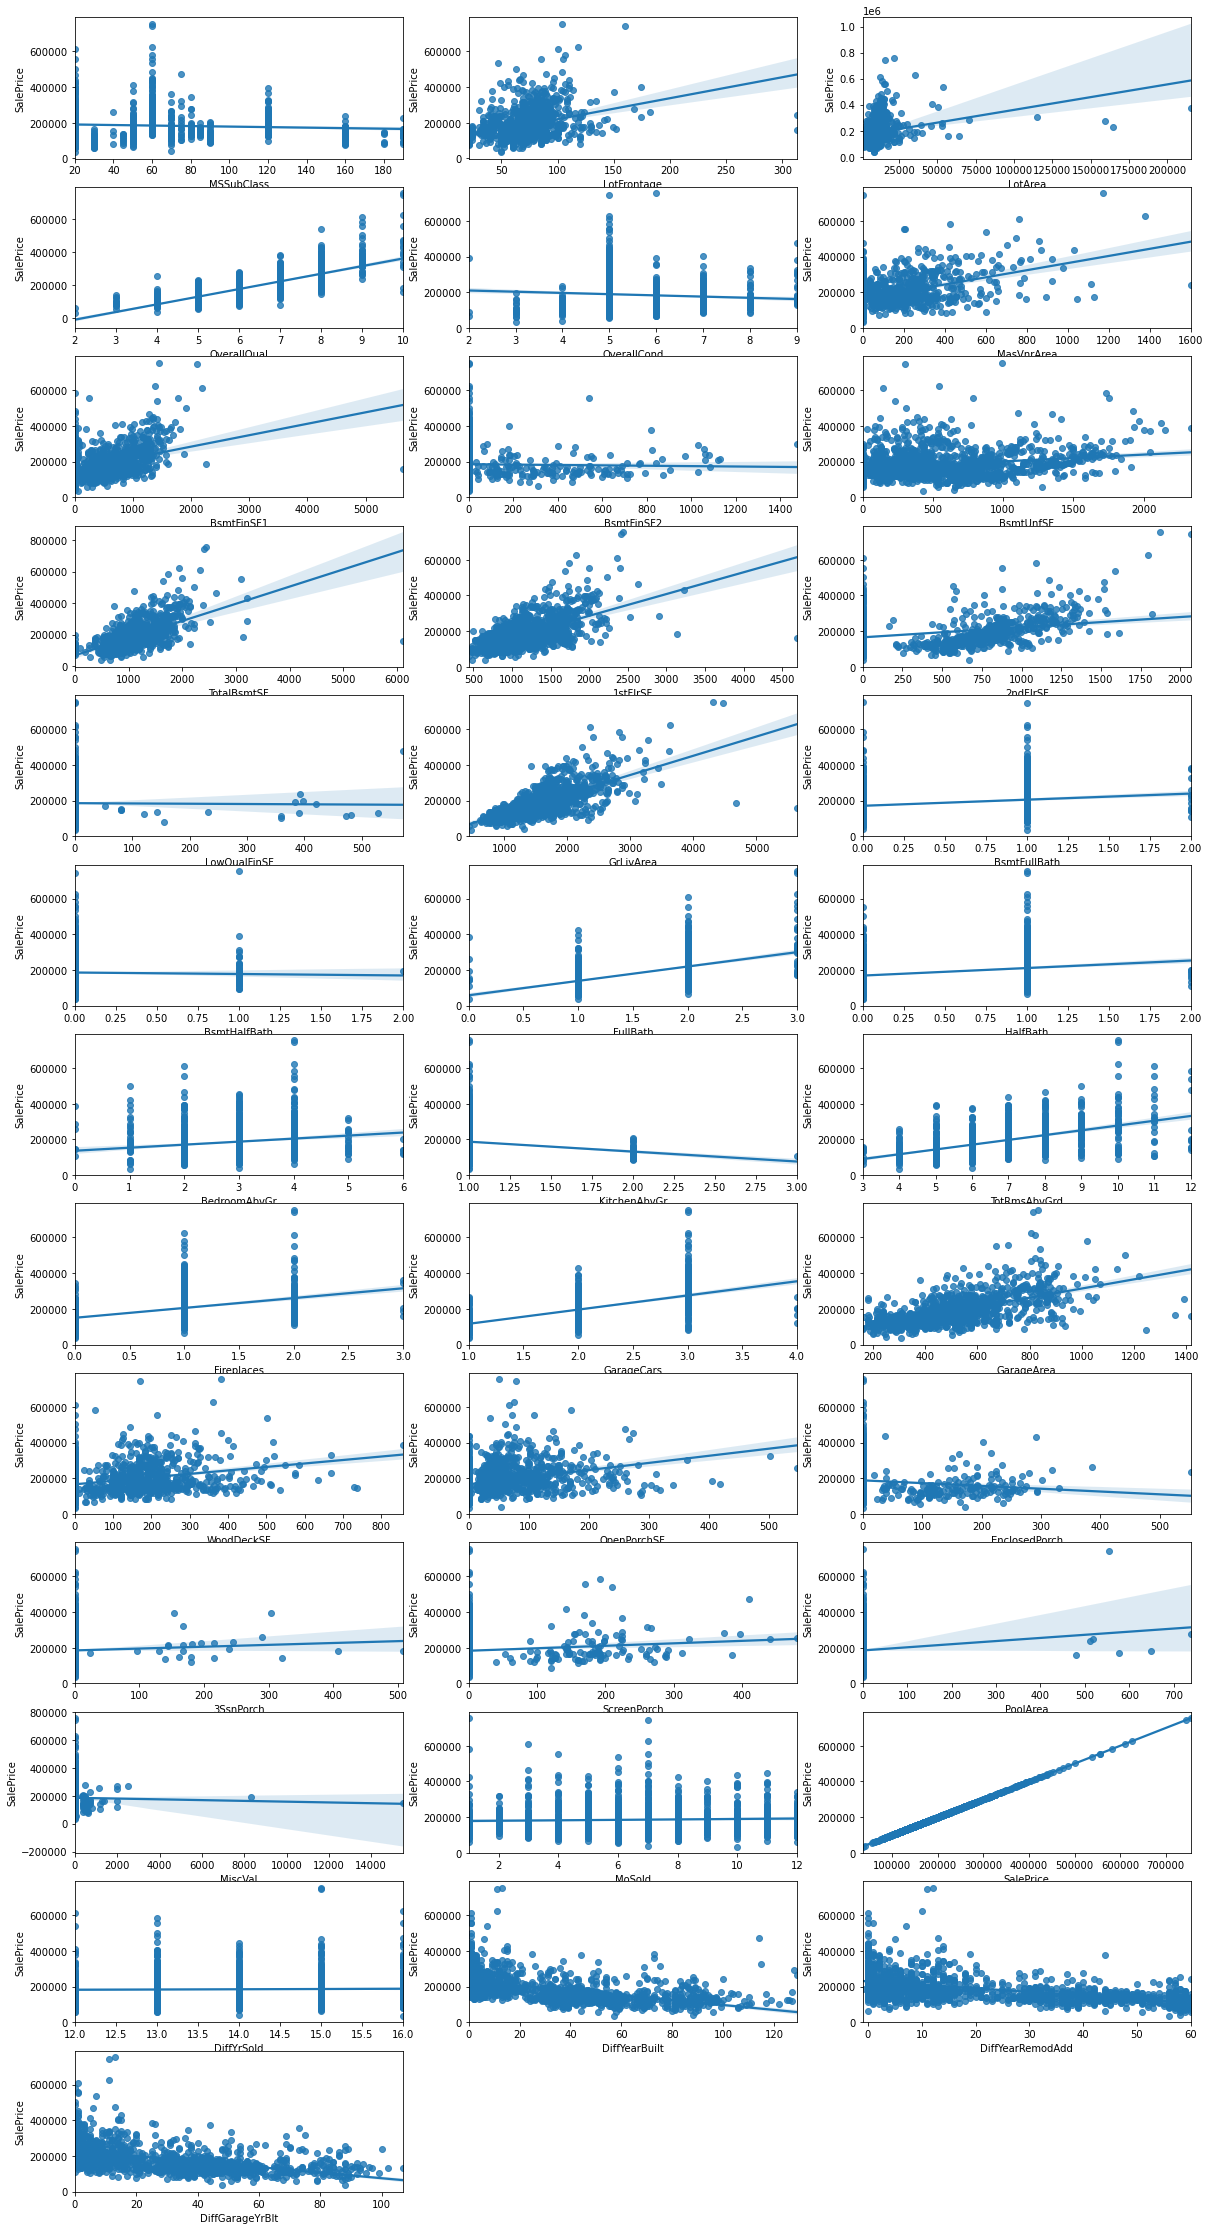

In [30]:
# To get all the numric columns at one place 
num_q = df.select_dtypes(include=['int64','float64'])
numerical_cols = list(num_q.drop('SalePrice',axis=1).columns.tolist())
#13,9
plt.figure(figsize = (20, 40))

for i,col in enumerate(num_q) :

    plt.subplot(13,3,i+1)
    sns.regplot(x=(num_q[col]),y='SalePrice', data = num_q)
            
plt.show()  

In [31]:
num_col

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'DiffYearBuilt',
 'DiffYearRemodAdd',
 'DiffGarageYrBlt']

### CATEGORICAL COLUMN ANALYSIS

<Figure size 432x288 with 0 Axes>

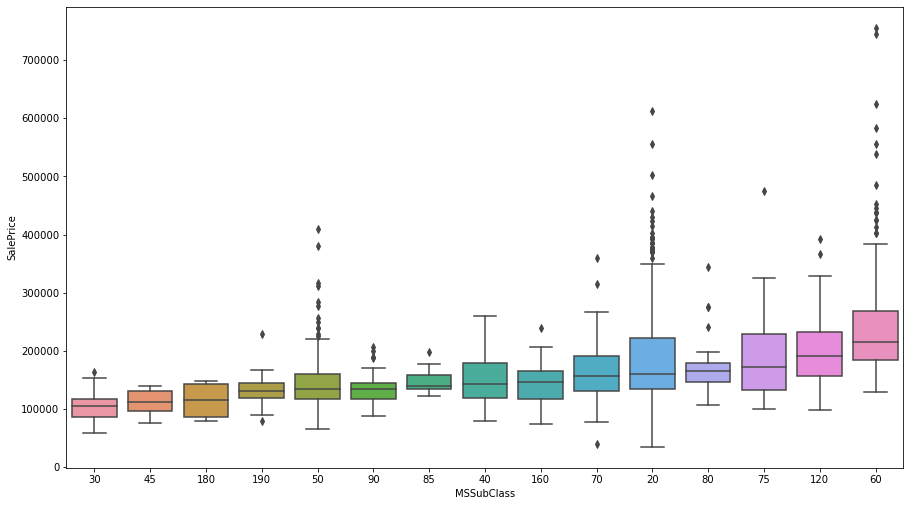

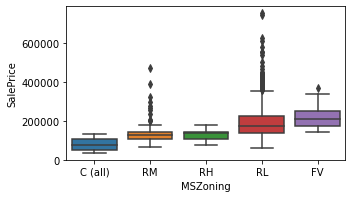

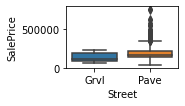

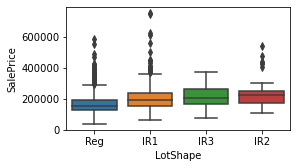

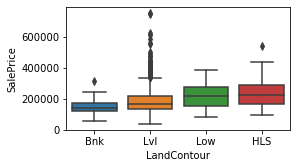

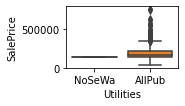

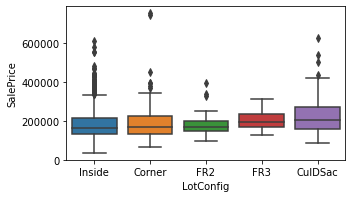

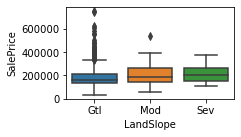

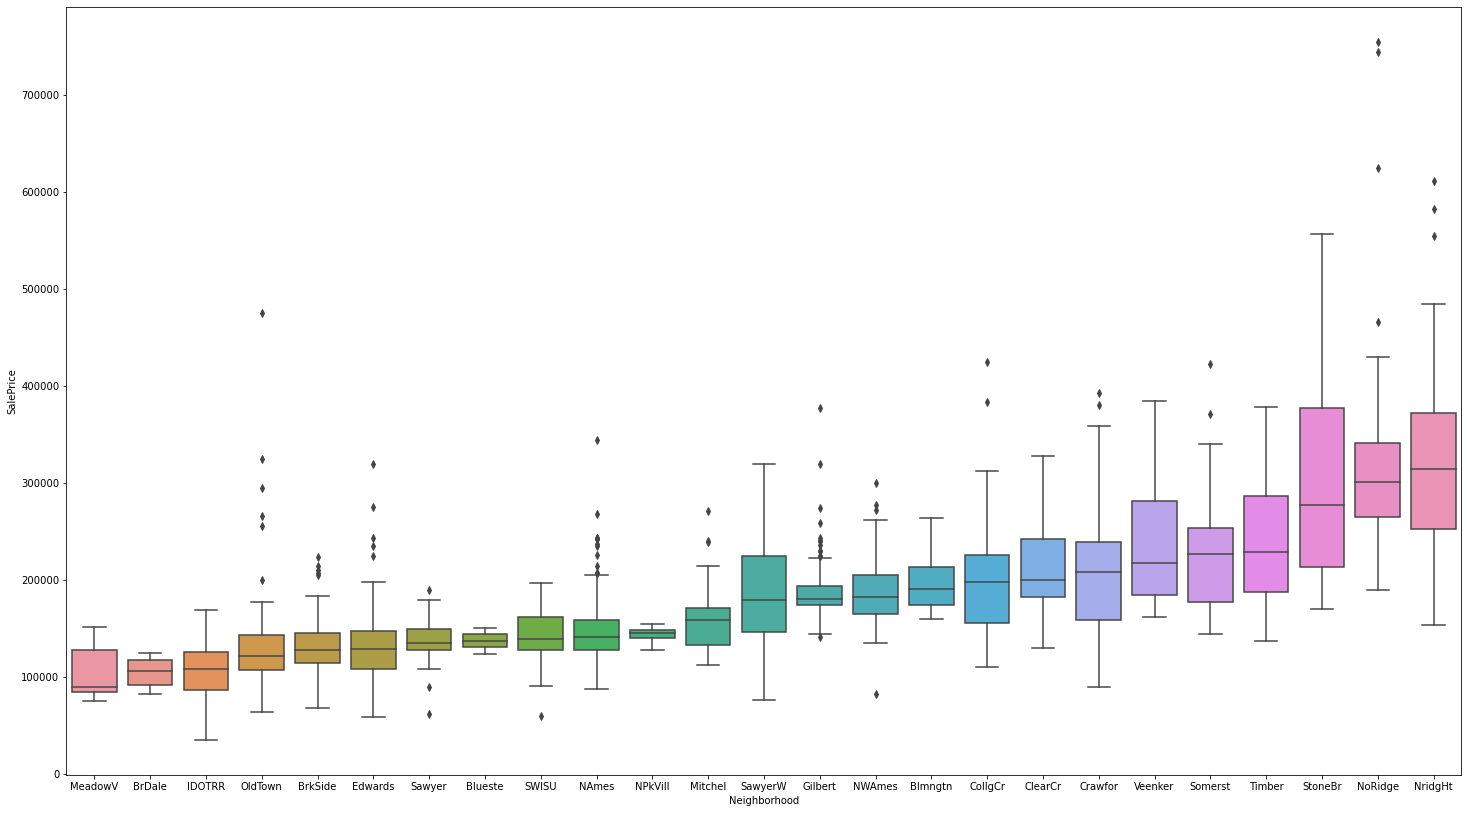

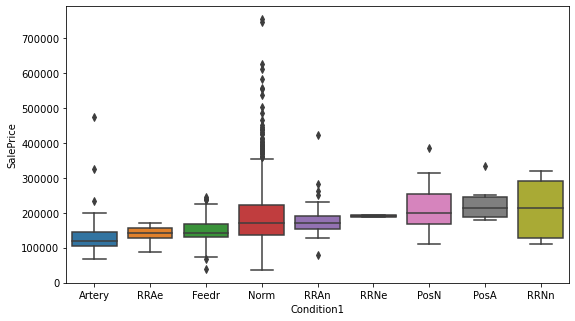

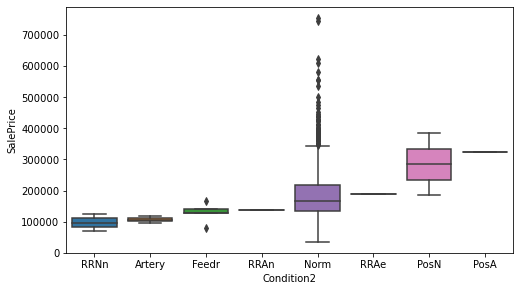

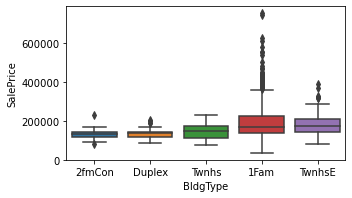

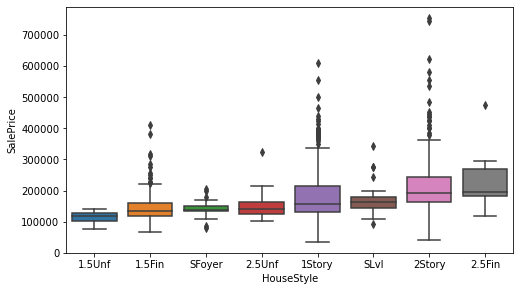

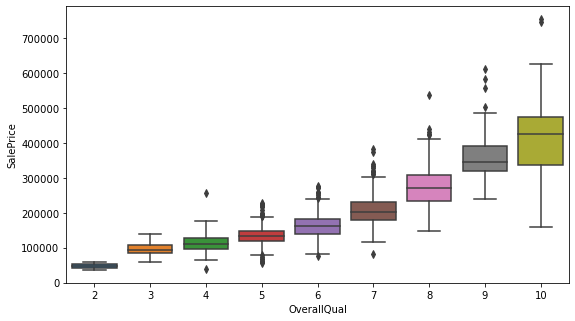

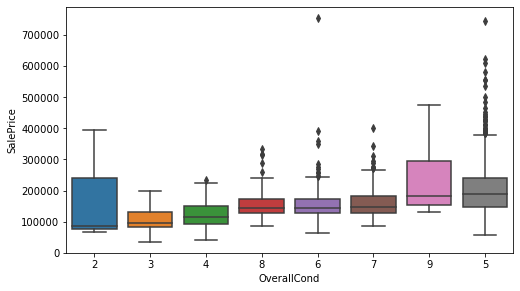

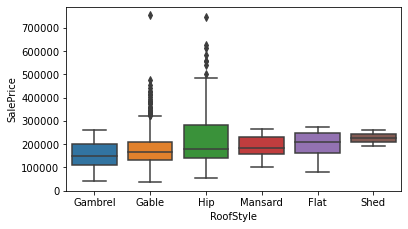

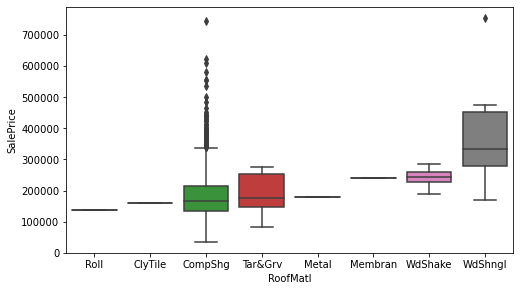

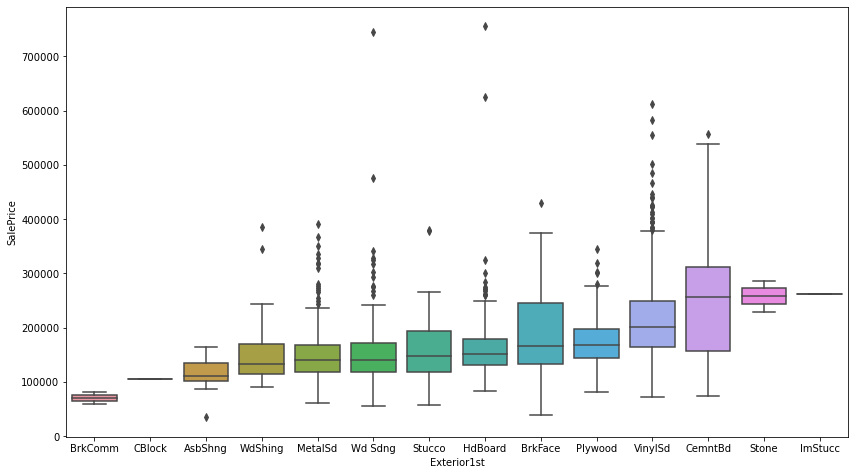

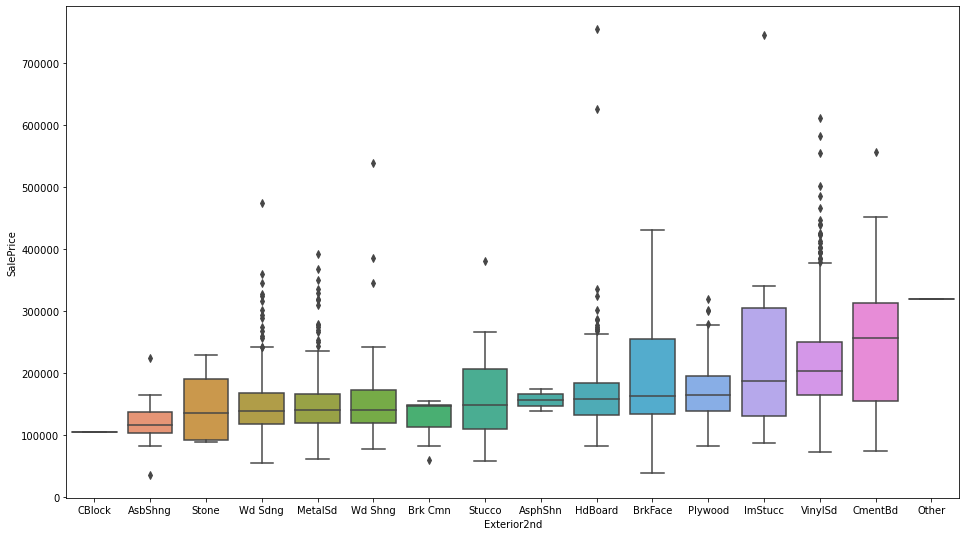

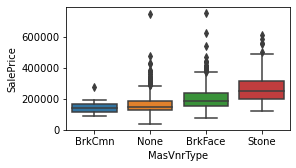

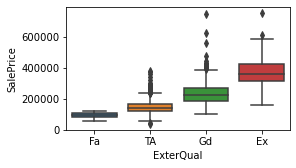

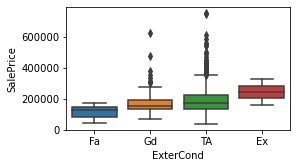

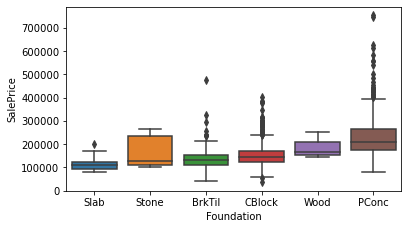

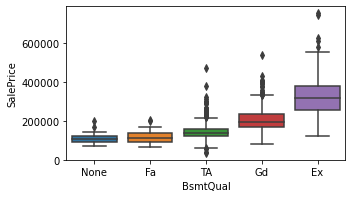

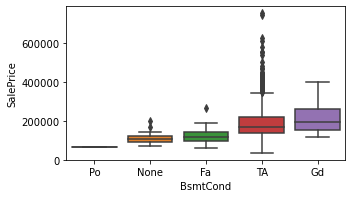

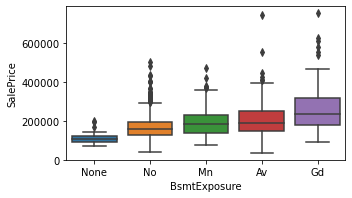

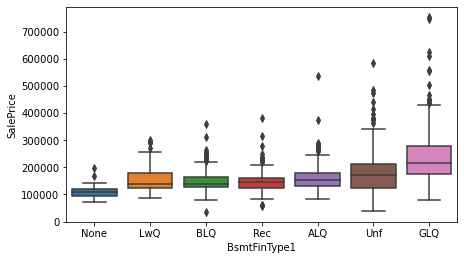

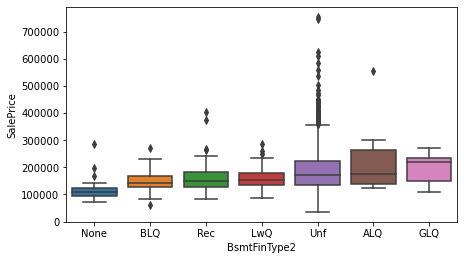

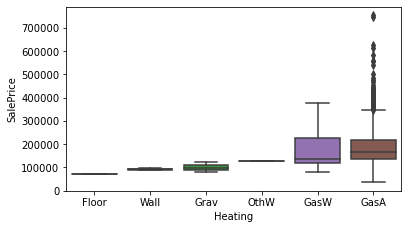

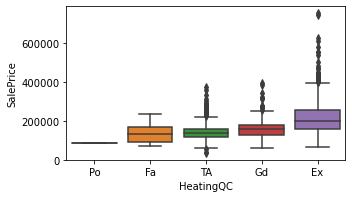

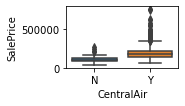

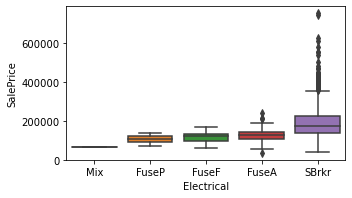

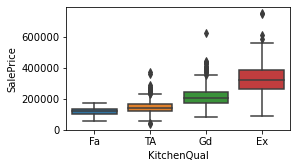

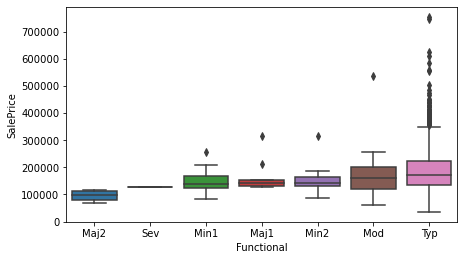

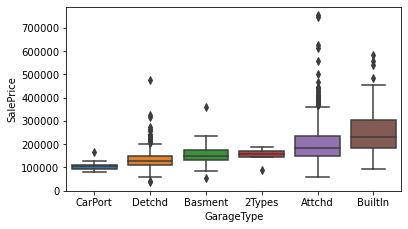

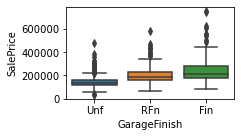

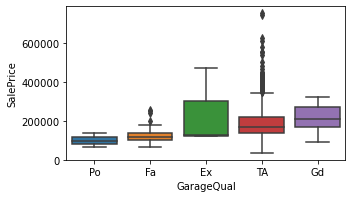

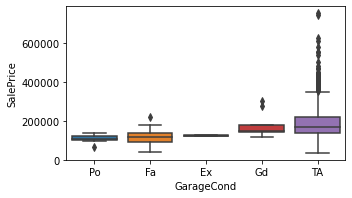

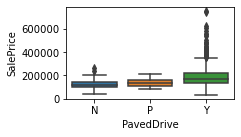

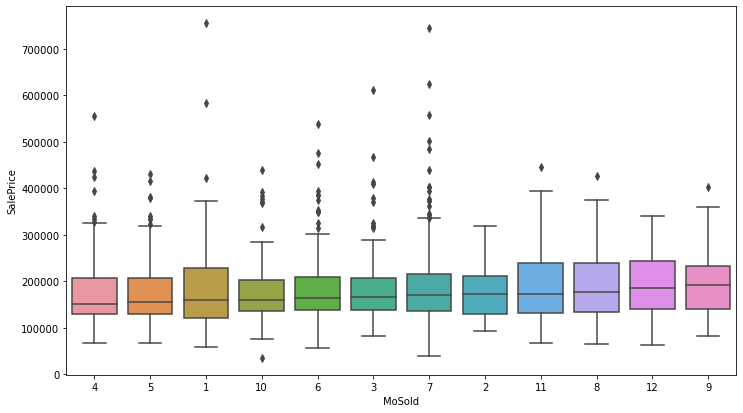

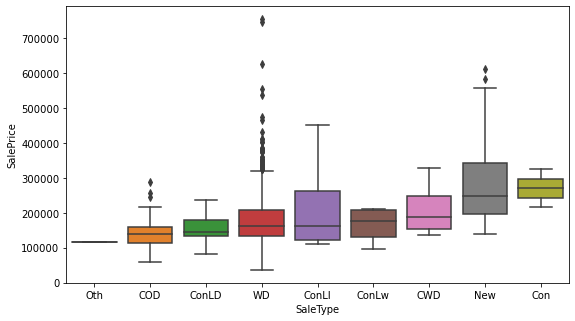

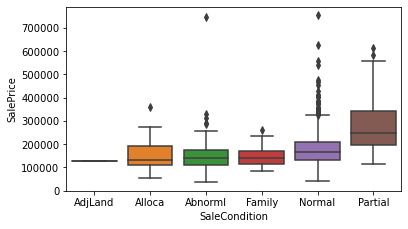

In [32]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)

### Co-relational Analysis

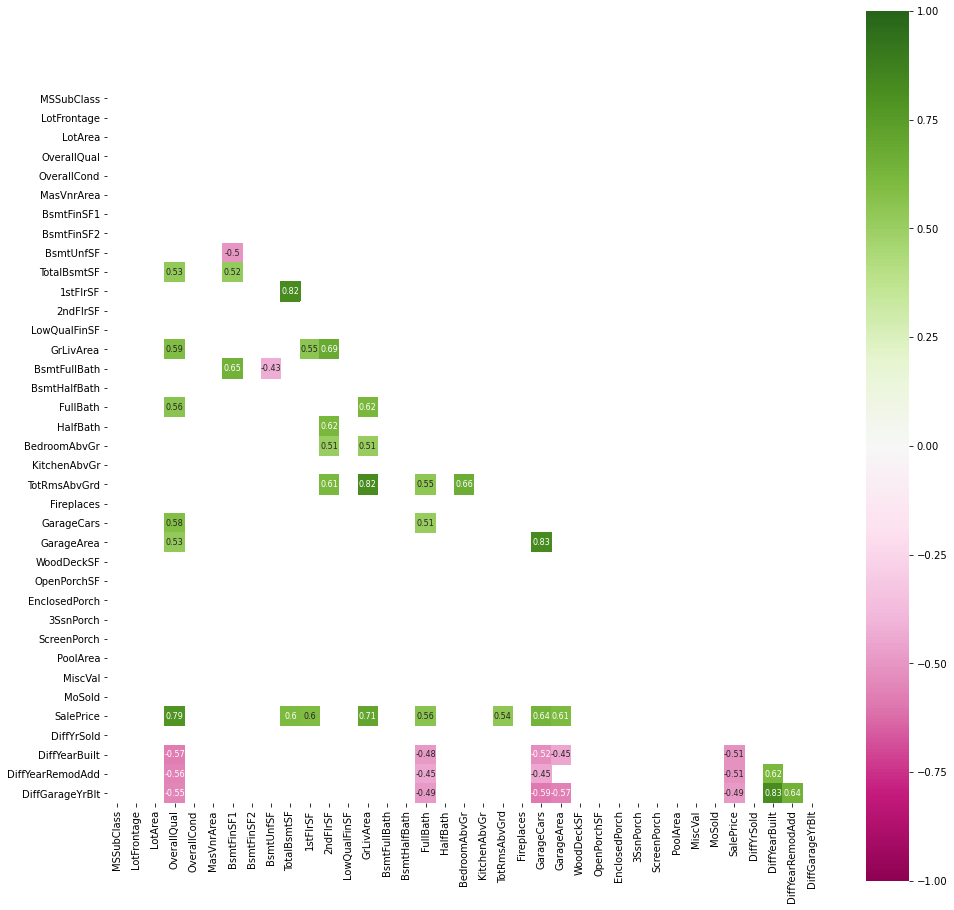

In [33]:
# Heat Map

# naive way 
corr = df.corr()

# corr
plt.figure(figsize=(16,16))
# Triangle Matrix
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# plotting correlations on a heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], mask=mask,
            cmap='PiYG', vmax=1.0, vmin=-1.0, 
            annot=True, annot_kws={"size": 8}, square=True);

**Summary**:
1. There plots above shows there exist some linear relationship between various columns and output column.
2. The heatmap is condensed however we do have collinearity in data

In [34]:
# Making Dummies of all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df = pd.concat([df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df.drop([col], axis = 1, inplace = True)

df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,DiffYrSold,DiffYearBuilt,DiffYearRemodAdd,DiffGarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,S

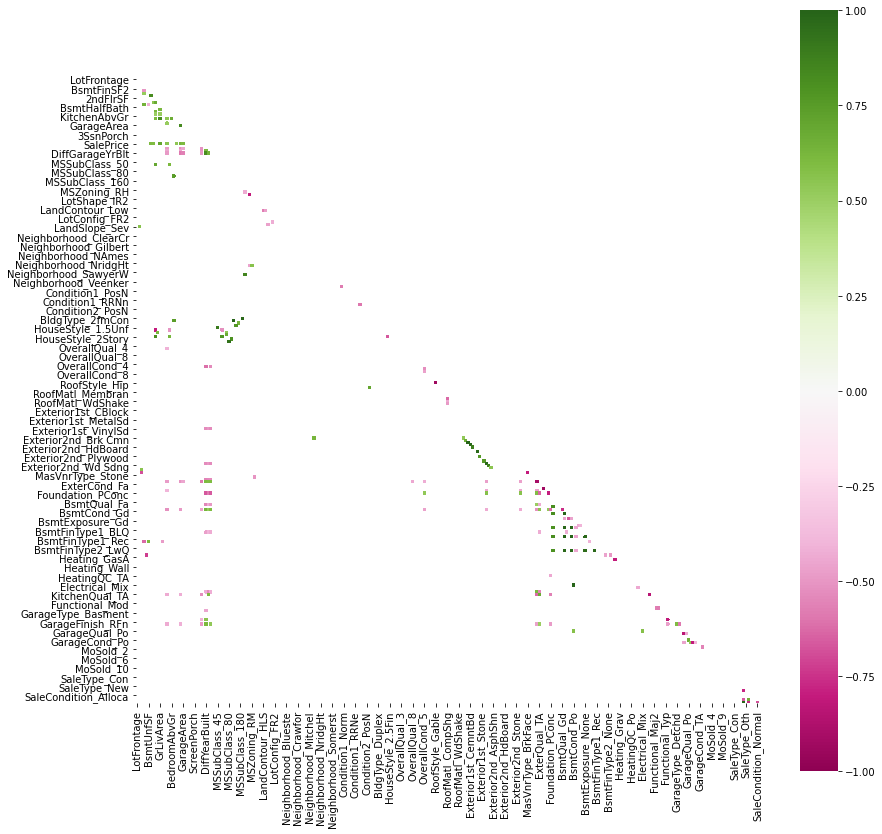

In [35]:
# plotting correlations on a heatmap

# naive way 
corr = df.corr()

# corr
plt.figure(figsize=(14,14))
# Triangle Matrix
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# plotting correlations on a heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], mask=mask,
            cmap='PiYG', vmax=1.0, vmin=-1.0, 
             square=True);

1. The heatmap is very condensed and we do have a lot of collinearity in data, hence feature selection is necessary.

## Data Preparation for Modelling

In [36]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(df[num_col]))

# Outlier Removed Records
selected = df[num_col][(z < 3).all(axis=1)]
df = df.loc[selected.index]
df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,DiffYrSold,DiffYearBuilt,DiffYearRemodAdd,DiffGarageYrBlt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,S

In [37]:
df.shape

(994, 272)

In [38]:
# Preparing Test and Train Set
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, 
                                     test_size = 0.3, random_state = 1)

# scale
scaler = StandardScaler()
scaler.fit_transform(df_train[num_col])

# Create X & y for train we need. a  X_train & a y_train. which we will make from df_train.
y_train = df_train.pop('SalePrice') # basically extract the column price from df_train. So, it just remove the column in place & assign it to y_train then whatelse remains is X_train.
X_train = df_train # whatever remain is assigned to X_train.


# Create X & y for train we need. a  X_train & a y_train. which we will make from df_train.
y_test = df_test.pop('SalePrice') # basically extract the column price from df_train. So, it just remove the column in place & assign it to y_train then whatelse remains is X_train.
X_test = df_test # whatever remain is assigned to X_train.




## Performing Simple Linear Regression

In [39]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print("r2 score for train by SLR is:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print("r2 score for test by SLR is:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))



r2 score for train by SLR is: 0.9499379409942024
r2 score for test by SLR is: 0.905676539243181


In [40]:
# Here the drop in r2 value from train to test is about 4.67% . 

In [41]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(100008.248, 'constant'),
 (-60525.261, 'MSSubClass_45'),
 (-53548.078, 'Street_Pave'),
 (48592.96, 'MSZoning_FV'),
 (-48034.003, 'SaleCondition_Alloca'),
 (-46753.303, 'SaleType_ConLw'),
 (45973.733, 'SaleCondition_AdjLand'),
 (-45880.684, 'Condition1_PosA'),
 (43714.89, 'OverallQual_9'),
 (38451.448, 'HouseStyle_1.5Unf'),
 (36659.519, 'SaleType_CWD'),
 (-35304.045, 'MSSubClass_160'),
 (34493.975, 'SaleCondition_Partial'),
 (-33350.803, 'Foundation_Wood'),
 (32956.653, 'MSZoning_RH'),
 (-32551.625, 'Neighborhood_MeadowV'),
 (-29553.935, 'BsmtFinType2_GLQ'),
 (-29360.571, 'MSSubClass_50'),
 (-28337.681, 'Heating_Grav'),
 (28204.36, 'MSZoning_RM'),
 (27733.863, 'Neighborhood_StoneBr'),
 (27614.196, 'OverallQual_10'),
 (-26862.997, 'LotConfig_FR3'),
 (26279.25, 'MSZoning_RL'),
 (-25914.224, 'HouseStyle_SFoyer'),
 (-25836.882, 'Neighborhood_Somerst'),
 (-25275.968, 'Neighborhood_NWAmes'),
 (25044.832, 'Condition1_PosN'),
 (-25043.614, 'MSSubClass_190'),
 (-24680.361, 'HouseStyle_1Story')


1. Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
2. Simple Linear Regression has not helped us in the feature selection.

## Performing Ridge Regression

In [42]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
17,6.000000,-10784.713458,-13966.979391,1
16,5.000000,-10640.863695,-13967.045258,2
18,7.000000,-10916.762610,-13985.748338,3
15,4.000000,-10492.073620,-13989.439045,4
19,8.000000,-11040.211958,-14015.104354,5
20,9.000000,-11154.878406,-14051.374423,6
14,3.000000,-10330.647570,-14074.900447,7
21,10.000000,-11261.370693,-14094.047432,8
13,2.000000,-10140.621376,-14272.099622,9
22,20,-12077.261959,-14533.888243,10


In [44]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=6.0)

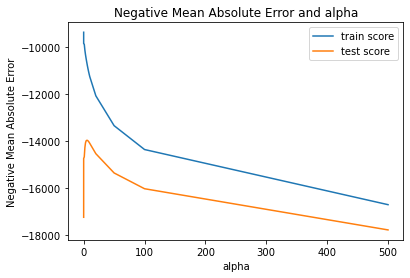

In [45]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [46]:
alpha = 6.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred_ridge = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9403333850675086
0.9287296356473124


### Ridge Model Parameters 

In [47]:
# ridge model parameters with top 31 features.
model_parameters_ridge = list(ridge.coef_)
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters_ridge]
cols_1 = X_train.columns
cols_1 = cols_1.insert(0, "constant")
ridge_selected_features = []
for k,v in sorted(list(zip(model_parameters_ridge,cols_1)), key=lambda x:abs(x[0]), reverse=True)[1:32]:
    ridge_selected_features.append(v)
sorted(list(zip(model_parameters_ridge,cols_1)), key=lambda x:abs(x[0]), reverse=True)

[(37593.44739424085, 'constant'),
 (25091.476973338915, 'OverallQual_9'),
 (24562.38229758912, 'Neighborhood_StoneBr'),
 (15690.712442884736, 'Neighborhood_Crawfor'),
 (15309.176365311389, 'Functional_Typ'),
 (-13052.182171248643, 'BsmtQual_Gd'),
 (-12153.987507895708, 'KitchenQual_Gd'),
 (11360.465649732367, 'BsmtExposure_Gd'),
 (11213.382271552053, 'SaleCondition_Partial'),
 (-10519.81537789438, 'Neighborhood_MeadowV'),
 (-10513.262972356899, 'OverallQual_4'),
 (-10409.248819963825, 'BsmtQual_TA'),
 (10260.152217154937, 'Exterior1st_BrkFace'),
 (-10089.108668689443, 'MSSubClass_160'),
 (-9798.612721258465, 'OverallQual_6'),
 (9725.18525185755, 'MSZoning_FV'),
 (9275.394734635072, 'Neighborhood_NridgHt'),
 (-9242.492827365057, 'Functional_Mod'),
 (-9230.414186423644, 'Neighborhood_Edwards'),
 (8970.944010177409, 'BsmtFinType1_GLQ'),
 (8924.209319349577, 'OverallQual_8'),
 (8768.139394099962, 'SaleType_CWD'),
 (-8752.691189485819, 'SaleCondition_Alloca'),
 (-8697.04609362742, 'KitchenQ

In [48]:
print(ridge_selected_features)

['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Functional_Typ', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Functional_Mod', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'LandContour_Low', 'OverallCond_8', 'LandContour_HLS', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3', 'Condition1_PosA']


**Summary**:
1. Ridge regression gave us a complex model with most of the coefficients as non-zero values.
2. Ridge regression has not helped us in the feature selection.

## Performing Lasso Regression

In [49]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100,-11326.558805,-13835.102537,1
23,50,-10628.643843,-14111.617032,2
22,20,-10061.403584,-14655.678966,3
21,10.000000,-9757.573841,-15229.134624,4
20,9.000000,-9722.450848,-15313.745273,5
19,8.000000,-9682.290947,-15411.628663,6
18,7.000000,-9645.423106,-15520.969994,7
17,6.000000,-9609.477011,-15644.420934,8
25,500,-14141.524269,-15762.059103,9
16,5.000000,-9571.129316,-15802.545101,10


In [51]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=100)

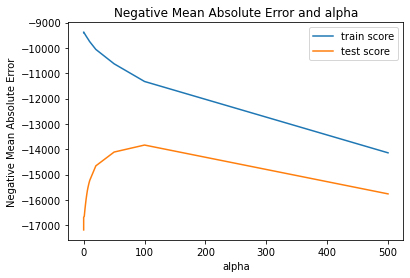

In [52]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [53]:
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# predict
y_train_pred_lasso = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9345009892728996
0.9249067651198359


### Lasso Model Parameters

In [54]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[0:32]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(38631.672, 'OverallQual_9'),
 (37396.479, 'constant'),
 (35932.304, 'Neighborhood_StoneBr'),
 (24959.901, 'Neighborhood_Crawfor'),
 (18115.336, 'SaleCondition_Partial'),
 (17900.18, 'Functional_Typ'),
 (15449.39, 'OverallQual_8'),
 (-12936.232, 'BsmtQual_Gd'),
 (12584.798, 'Exterior1st_BrkFace'),
 (12401.129, 'BsmtExposure_Gd'),
 (11952.354, 'Neighborhood_NridgHt'),
 (10815.724, 'MSZoning_FV'),
 (-9894.801, 'SaleCondition_Alloca'),
 (-9822.908, 'MSSubClass_160'),
 (-8860.766, 'BsmtQual_TA'),
 (-8756.304, 'KitchenQual_Gd'),
 (8157.34, 'BsmtFinType1_GLQ'),
 (-7891.51, 'OverallCond_4'),
 (7395.048, 'Neighborhood_NoRidge'),
 (-7345.084, 'OverallCond_5'),
 (6974.957, 'Neighborhood_BrkSide'),
 (6618.068, 'MasVnrType_Stone'),
 (-6518.458, 'KitchenQual_TA'),
 (-6321.083, 'Neighborhood_MeadowV'),
 (-5819.436, 'OverallQual_4'),
 (5661.052, 'Condition1_Norm'),
 (-5494.839, 'BldgType_TwnhsE'),
 (5254.561, 'LandContour_HLS'),
 (-5212.381, 'OverallQual_6'),
 (-5007.781, 'Neighborhood_Edwards'),
 (

In [55]:
lasso_selected_features.remove('constant')
print(lasso_selected_features)

['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'OverallCond_4', 'Neighborhood_NoRidge', 'OverallCond_5', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'LandContour_HLS', 'OverallQual_6', 'Neighborhood_Edwards', 'ExterCond_Gd', 'Functional_Mod']


**Summary**:
1. Lasso Regression gave us a simpler model with most of the coefficients as zero values.
2. Lasso Regression has helped us in the feature selection.

# Simple Linear Regression Model

### Using RFE for Automated Selection of Features  

In [56]:
# Running RFE with the output number of the variable equal to 40
lm = LinearRegression()
rfe = RFE(lm, 40)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['FullBath', 'MSSubClass_45', 'MSSubClass_90', 'MSZoning_FV', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition2_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf', 'OverallQual_8', 'OverallQual_9', 'OverallCond_3', 'OverallCond_9', 'Exterior1st_CemntBd', 'Exterior2nd_CBlock', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtFinType1_None', 'BsmtFinType2_None', 'Heating_GasW', 'Heating_Grav', 'Electrical_FuseP', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageQual_Fa', 'GarageQual_Gd', 'SaleType_CWD'], dtype='object')

In [58]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [59]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(df[auto_selected_predictors]))

Parameters obtained for ['FullBath', 'MSSubClass_45', 'MSSubClass_90', 'MSZoning_FV', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition2_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf', 'OverallQual_8', 'OverallQual_9', 'OverallCond_3', 'OverallCond_9', 'Exterior1st_CemntBd', 'Exterior2nd_CBlock', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtFinType1_None', 'BsmtFinType2_None', 'Heating_GasW', 'Heating_Grav', 'Electrical_FuseP', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageQual_Fa', 'GarageQual_Gd', 'SaleType_CWD']
const                  142229.015450
FullBath                35562.644192
MSSubClass_45          -81553.776198
MSSubClass_90          -16575.128428
MSZoning_FV             24172.640100
Neighborhood_Crawfor    44086.15824

The Simple Linear Regression model is too complex for us to design as because of Vif values we got. so we can't move forward in it.

# Ridge Model

In [60]:
# MODEL 1
# Let's consider all the columns selected by Lasso for our second model

make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Functional_Typ', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Functional_Mod', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'LandContour_Low', 'OverallCond_8', 'LandContour_HLS', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3', 'Condition1_PosA']
const                   185748.839151
OverallQual_9           104064.038386
Neighborhood_StoneBr     38896.282966
Neighborhood_Crawfor     40524.550557
Functional_Typ            2927.935640
BsmtQual_Gd              -8915.932817
KitchenQual_Gd           -3918.014256
BsmtExposure_Gd          31112.381243
SaleCondition_Partial    26332.199239
Neighborhood_MeadowV    -27

In [61]:
# MODEL 2
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `Functional_Mod` as it has p value of `0.993` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Functional_Typ', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'LandContour_Low', 'OverallCond_8', 'LandContour_HLS', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3', 'Condition1_PosA']
const                   185763.646809
OverallQual_9           104066.163649
Neighborhood_StoneBr     38896.192882
Neighborhood_Crawfor     40524.296472
Functional_Typ            2910.712661
BsmtQual_Gd              -8912.667469
KitchenQual_Gd           -3917.454939
BsmtExposure_Gd          31112.369894
SaleCondition_Partial    26332.289913
Neighborhood_MeadowV    -27749.078043
Overall

In [62]:
# MODEL 3
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `OverallCond_8` as it has p value of `0.990` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('OverallCond_8')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Functional_Typ', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'LandContour_Low', 'LandContour_HLS', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3', 'Condition1_PosA']
const                   185773.331492
OverallQual_9           104062.580215
Neighborhood_StoneBr     38895.030180
Neighborhood_Crawfor     40541.534693
Functional_Typ            2907.495832
BsmtQual_Gd              -8917.317666
KitchenQual_Gd           -3917.249255
BsmtExposure_Gd          31113.669365
SaleCondition_Partial    26329.843274
Neighborhood_MeadowV    -27733.927699
OverallQual_4           

In [63]:
# MODEL 3
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `LandContour_Low` as it has p value of `0.970` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('LandContour_Low')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Functional_Typ', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'LandContour_HLS', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3', 'Condition1_PosA']
const                   185762.592997
OverallQual_9           104073.613895
Neighborhood_StoneBr     38864.715558
Neighborhood_Crawfor     40544.203112
Functional_Typ            2908.969137
BsmtQual_Gd              -8914.455518
KitchenQual_Gd           -3923.992012
BsmtExposure_Gd          31072.364467
SaleCondition_Partial    26338.093034
Neighborhood_MeadowV    -27719.419610
OverallQual_4           -25088.760842
BsmtQ

In [64]:
# MODEL 4
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `Condition1_PosA` as it has p value of `0.867` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('Condition1_PosA')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Functional_Typ', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'LandContour_HLS', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   185650.734338
OverallQual_9           104111.016127
Neighborhood_StoneBr     38885.964159
Neighborhood_Crawfor     40568.980354
Functional_Typ            3029.155372
BsmtQual_Gd              -8951.007314
KitchenQual_Gd           -3900.310201
BsmtExposure_Gd          30932.430849
SaleCondition_Partial    26364.203354
Neighborhood_MeadowV    -27689.324387
OverallQual_4           -25075.467123
BsmtQual_TA             

In [65]:
# MODEL 5
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `LandContour_HLS` as it has p value of `0.784` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('LandContour_HLS')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Functional_Typ', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   185734.271385
OverallQual_9           103853.956698
Neighborhood_StoneBr     38740.457449
Neighborhood_Crawfor     40189.791995
Functional_Typ            2989.280629
BsmtQual_Gd              -8960.890766
KitchenQual_Gd           -3975.085170
BsmtExposure_Gd          30708.173561
SaleCondition_Partial    26174.705235
Neighborhood_MeadowV    -27617.248073
OverallQual_4           -25106.165960
BsmtQual_TA             -28456.518543
Exter

In [66]:
# MODEL 6
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `Functional_Typ` as it has p value of `0.632` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   188309.248104
OverallQual_9           104079.330421
Neighborhood_StoneBr     38644.991799
Neighborhood_Crawfor     40382.534004
BsmtQual_Gd              -8872.252053
KitchenQual_Gd           -3875.269220
BsmtExposure_Gd          30664.391813
SaleCondition_Partial    26288.502947
Neighborhood_MeadowV    -27109.331966
OverallQual_4           -25069.495365
BsmtQual_TA             -28316.750742
Exterior1st_BrkFace      22587.910795
MSSubClass_160         

In [67]:
# MODEL 7
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `Neighborhood_Mitchel` as it has p value of `0.639` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('Neighborhood_Mitchel')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   188167.255872
OverallQual_9           104168.675298
Neighborhood_StoneBr     38701.791928
Neighborhood_Crawfor     40550.228568
BsmtQual_Gd              -8774.097584
KitchenQual_Gd           -3908.585198
BsmtExposure_Gd          30554.019179
SaleCondition_Partial    26386.686978
Neighborhood_MeadowV    -26942.853861
OverallQual_4           -25071.833538
BsmtQual_TA             -28205.240364
Exterior1st_BrkFace      22561.717393
MSSubClass_160          -15594.615397
OverallQu

In [68]:
# MODEL 8
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `KitchenQual_Gd` as it has p value of `0.534` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('KitchenQual_Gd')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleType_CWD', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   185004.709775
OverallQual_9           106525.313931
Neighborhood_StoneBr     38853.261988
Neighborhood_Crawfor     40541.710539
BsmtQual_Gd              -9288.502235
BsmtExposure_Gd          30305.477256
SaleCondition_Partial    26418.041655
Neighborhood_MeadowV    -26836.667164
OverallQual_4           -24931.899085
BsmtQual_TA             -28352.137228
Exterior1st_BrkFace      22622.481496
MSSubClass_160          -15666.338660
OverallQual_6            -3030.823365
MSZoning_FV              14

In [69]:
# MODEL 8
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `SaleType_CWD` as it has p value of `0.378` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('SaleType_CWD')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'OverallQual_6', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   185070.787541
OverallQual_9           107851.889353
Neighborhood_StoneBr     38571.321641
Neighborhood_Crawfor     42053.106263
BsmtQual_Gd              -9474.144796
BsmtExposure_Gd          30263.473540
SaleCondition_Partial    26225.585154
Neighborhood_MeadowV    -26783.086925
OverallQual_4           -24994.338385
BsmtQual_TA             -28384.912924
Exterior1st_BrkFace      22390.919225
MSSubClass_160          -15859.230883
OverallQual_6            -3098.090408
MSZoning_FV              15091.100308
Neigh

In [70]:
# MODEL 9
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `OverallQual_6` as it has p value of `0.357` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('OverallQual_6')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_MeadowV', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   184346.268486
OverallQual_9           108304.514898
Neighborhood_StoneBr     38931.592928
Neighborhood_Crawfor     41862.967451
BsmtQual_Gd              -9694.480293
BsmtExposure_Gd          29865.118591
SaleCondition_Partial    26284.952594
Neighborhood_MeadowV    -25900.167765
OverallQual_4           -23982.136178
BsmtQual_TA             -28388.373566
Exterior1st_BrkFace      22777.915765
MSSubClass_160          -16161.769040
MSZoning_FV              15562.493014
Neighborhood_NridgHt     27295.375958
Neighborhood_Edwards  

In [71]:
# MODEL 10
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `Neighborhood_MeadowV` as it has p value of `0.076` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('Neighborhood_MeadowV')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   184797.395579
OverallQual_9           107898.599996
Neighborhood_StoneBr     39503.868159
Neighborhood_Crawfor     41798.763781
BsmtQual_Gd              -9936.942869
BsmtExposure_Gd          29668.641147
SaleCondition_Partial    26123.768924
OverallQual_4           -25996.946883
BsmtQual_TA             -28303.974802
Exterior1st_BrkFace      22613.146579
MSSubClass_160          -18258.553740
MSZoning_FV              16535.394783
Neighborhood_NridgHt     27822.444164
Neighborhood_Edwards     -9325.865526
BsmtFinType1_GLQ         22101.015521
OverallQ

In [72]:
# MODEL 11
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `Neighborhood_Edwards` as it has p value of `0.105` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('Neighborhood_Edwards')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NridgHt', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   183599.792013
OverallQual_9           107944.986948
Neighborhood_StoneBr     39827.347756
Neighborhood_Crawfor     42364.075232
BsmtQual_Gd              -9232.926365
BsmtExposure_Gd          29833.533262
SaleCondition_Partial    26317.266218
OverallQual_4           -27738.791354
BsmtQual_TA             -27704.577377
Exterior1st_BrkFace      22701.148070
MSSubClass_160          -17946.487843
MSZoning_FV              16978.167975
Neighborhood_NridgHt     28448.725229
BsmtFinType1_GLQ         22207.672070
OverallQual_8            51410.450655
SaleCondition_Alloca    -70886.2

In [73]:
# MODEL 12
# We got better VIF values with the features selected by Ridge, hence refining the model manually.
# Removing `BsmtQual_Gd` as it has p value of `0.077` which is higher than `0.05`.
# That means, this variable is insignificant.
ridge_selected_features.remove('BsmtQual_Gd')
make_lr_model_mp(list(df[ridge_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'OverallQual_4', 'BsmtQual_TA', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NridgHt', 'BsmtFinType1_GLQ', 'OverallQual_8', 'SaleCondition_Alloca', 'KitchenQual_TA', 'Neighborhood_NWAmes', 'BldgType_Twnhs', 'OverallCond_3']
const                   175362.747616
OverallQual_9           113810.512863
Neighborhood_StoneBr     40100.097479
Neighborhood_Crawfor     41588.526902
BsmtExposure_Gd          30668.952242
SaleCondition_Partial    27380.829171
OverallQual_4           -26956.674276
BsmtQual_TA             -20094.008149
Exterior1st_BrkFace      23526.872294
MSSubClass_160          -18735.231879
MSZoning_FV              17288.653645
Neighborhood_NridgHt     30282.668892
BsmtFinType1_GLQ         21495.251856
OverallQual_8            52382.747496
SaleCondition_Alloca    -67187.015444
KitchenQual_TA          -23836.781919
Neighborh

The present model seems fine as `p-value is less than 0.05` and `VIF is less than 3` with `Adjusted R-square of 0.708`

so, we are pretty confident with the predictions that our model is making.

# CONCLUSION

In [74]:
# final model have 18 parameters.
ridge_selected_features

['OverallQual_9',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'BsmtExposure_Gd',
 'SaleCondition_Partial',
 'OverallQual_4',
 'BsmtQual_TA',
 'Exterior1st_BrkFace',
 'MSSubClass_160',
 'MSZoning_FV',
 'Neighborhood_NridgHt',
 'BsmtFinType1_GLQ',
 'OverallQual_8',
 'SaleCondition_Alloca',
 'KitchenQual_TA',
 'Neighborhood_NWAmes',
 'BldgType_Twnhs',
 'OverallCond_3']

From our initial set of columns, few of the major influencers (By Ridge Model) for Sales Pricing are: 
1. OverallQual (when it is :- 9,4,8,3)
2. Neighborhood (when it is  :- StoneBr,Crawfor,NridgHt,NWAmes)
3. BsmtExposure (when it is :- Gd)
4. SaleCondition (when it is :- Partial,Alloca)
5. BsmtQual (when it is :- TA) 
6. Exterior1st (when it is :- BrkFace)
7. MSSubClass (when it is :- 160)
8. MSZoning (when it is :- FV)
9. BsmtFinType1 (when it is :- GLQ)
10. KitchenQual (when it is :- TA) 
11. BldgType (when it is :- TwnhsE)

----

# Lasso Model

In [75]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'OverallCond_4', 'Neighborhood_NoRidge', 'OverallCond_5', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'LandContour_HLS', 'OverallQual_6', 'Neighborhood_Edwards', 'ExterCond_Gd', 'Functional_Mod']
const                   173119.685800
OverallQual_9            98010.651342
Neighborhood_StoneBr     62223.107969
Neighborhood_Crawfor     41722.539116
SaleCondition_Partial    25857.769667
Functional_Typ            4045.333824
OverallQual_8            40329.395292
BsmtQual_Gd              -7039.366554
Exterior1st_BrkFace      22372.068966
BsmtExposure_Gd         

In [76]:
# MODEL 3
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `OverallQual_6` as it has p value of `0.812` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('OverallQual_6')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'OverallCond_4', 'Neighborhood_NoRidge', 'OverallCond_5', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'LandContour_HLS', 'Neighborhood_Edwards', 'ExterCond_Gd', 'Functional_Mod']
const                   173208.655603
OverallQual_9            97902.771296
Neighborhood_StoneBr     62082.971093
Neighborhood_Crawfor     41755.208158
SaleCondition_Partial    25813.173113
Functional_Typ            4172.154968
OverallQual_8            40153.772810
BsmtQual_Gd              -6984.736976
Exterior1st_BrkFace      22305.125783
BsmtExposure_Gd          29895.564986
Nei

In [77]:
# MODEL 4
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `LandContour_HLS` as it has p value of `0.607` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('LandContour_HLS')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'OverallCond_4', 'Neighborhood_NoRidge', 'OverallCond_5', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'Neighborhood_Edwards', 'ExterCond_Gd', 'Functional_Mod']
const                   173221.696631
OverallQual_9            97622.100911
Neighborhood_StoneBr     61881.661826
Neighborhood_Crawfor     41381.576881
SaleCondition_Partial    25591.009535
Functional_Typ            4134.939598
OverallQual_8            39973.060232
BsmtQual_Gd              -7009.145423
Exterior1st_BrkFace      22251.580213
BsmtExposure_Gd          29646.591343
Neighborhood_NridgHt  

In [78]:
# MODEL 5
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `ExterCond_Gd` as it has p value of `0.361` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('ExterCond_Gd')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'OverallCond_4', 'Neighborhood_NoRidge', 'OverallCond_5', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'Neighborhood_Edwards', 'Functional_Mod']
const                   172663.921496
OverallQual_9            97751.544201
Neighborhood_StoneBr     61685.214751
Neighborhood_Crawfor     41682.943986
SaleCondition_Partial    25752.906229
Functional_Typ            4021.742269
OverallQual_8            40142.481307
BsmtQual_Gd              -6999.547934
Exterior1st_BrkFace      22674.363243
BsmtExposure_Gd          29517.565010
Neighborhood_NridgHt     29901.765021


In [79]:
# MODEL 6
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `Neighborhood_BrkSide` as it has p value of `0.342` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('Neighborhood_BrkSide')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'OverallCond_4', 'Neighborhood_NoRidge', 'OverallCond_5', 'MasVnrType_Stone', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'Neighborhood_Edwards', 'Functional_Mod']
const                   171902.184107
OverallQual_9            98016.078537
Neighborhood_StoneBr     61709.137149
Neighborhood_Crawfor     41882.042057
SaleCondition_Partial    25792.834756
Functional_Typ            4010.142585
OverallQual_8            40192.406537
BsmtQual_Gd              -6931.294636
Exterior1st_BrkFace      22827.745810
BsmtExposure_Gd          29557.922615
Neighborhood_NridgHt     29932.620396
MSZoning_FV             

In [80]:
# MODEL 7
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `OverallCond_4` as it has p value of `0.285` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('OverallCond_4')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_NoRidge', 'OverallCond_5', 'MasVnrType_Stone', 'KitchenQual_TA', 'Neighborhood_MeadowV', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'Neighborhood_Edwards', 'Functional_Mod']
const                   170391.609445
OverallQual_9            98213.066276
Neighborhood_StoneBr     61747.825427
Neighborhood_Crawfor     42356.237357
SaleCondition_Partial    25724.497025
Functional_Typ            4566.275726
OverallQual_8            40174.638854
BsmtQual_Gd              -7190.652954
Exterior1st_BrkFace      22195.656346
BsmtExposure_Gd          29597.901747
Neighborhood_NridgHt     29833.679475
MSZoning_FV              20673.748561
Sal

In [81]:
# MODEL 8
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `Neighborhood_MeadowV` as it has p value of `0.270` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('Neighborhood_MeadowV')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_NoRidge', 'OverallCond_5', 'MasVnrType_Stone', 'KitchenQual_TA', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'Neighborhood_Edwards', 'Functional_Mod']
const                   170990.738499
OverallQual_9            97990.775626
Neighborhood_StoneBr     62713.179938
Neighborhood_Crawfor     42434.730791
SaleCondition_Partial    25676.097114
Functional_Typ            4090.514815
OverallQual_8            40071.495403
BsmtQual_Gd              -7268.702385
Exterior1st_BrkFace      22067.966901
BsmtExposure_Gd          29435.947818
Neighborhood_NridgHt     30357.901192
MSZoning_FV              21494.262123
SaleCondition_Alloca    -75

In [82]:
# MODEL 9
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `Functional_Typ` as it has p value of `0.204` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_NoRidge', 'OverallCond_5', 'MasVnrType_Stone', 'KitchenQual_TA', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'Neighborhood_Edwards', 'Functional_Mod']
const                   174464.361949
OverallQual_9            98347.282144
Neighborhood_StoneBr     62550.076814
Neighborhood_Crawfor     42663.970674
SaleCondition_Partial    25893.198186
OverallQual_8            40203.933141
BsmtQual_Gd              -7075.369915
Exterior1st_BrkFace      21845.681429
BsmtExposure_Gd          29417.151669
Neighborhood_NridgHt     30603.666004
MSZoning_FV              21759.171484
SaleCondition_Alloca    -75383.932826
MSSubClass_160          -24309.852878
BsmtQua

In [83]:
# MODEL 10
# We got better VIF values with the features selected by Lasso, hence refining the model manually.
# Removing `Functional_Mod` as it has p value of `0.498` which is higher than `0.05`.
# That means, this variable is insignificant.
lasso_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(df[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallQual_8', 'BsmtQual_Gd', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'SaleCondition_Alloca', 'MSSubClass_160', 'BsmtQual_TA', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_NoRidge', 'OverallCond_5', 'MasVnrType_Stone', 'KitchenQual_TA', 'OverallQual_4', 'Condition1_Norm', 'BldgType_TwnhsE', 'Neighborhood_Edwards']
const                   174361.416873
OverallQual_9            98255.777570
Neighborhood_StoneBr     62527.178477
Neighborhood_Crawfor     42922.148827
SaleCondition_Partial    25915.985638
OverallQual_8            40221.985457
BsmtQual_Gd              -7276.105634
Exterior1st_BrkFace      21927.240913
BsmtExposure_Gd          29428.737037
Neighborhood_NridgHt     30528.977388
MSZoning_FV              21772.173614
SaleCondition_Alloca    -75390.823096
MSSubClass_160          -24196.581619
BsmtQual_TA             -

The present model seems fine as `p-value is less than 0.05` and `VIF is less than 3` with `Adjusted R-square of 0.703`

so, we are pretty confident with the predictions that our model is making.

In [84]:
# final model have 22 parameters.
lasso_selected_features

['OverallQual_9',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'OverallQual_8',
 'BsmtQual_Gd',
 'Exterior1st_BrkFace',
 'BsmtExposure_Gd',
 'Neighborhood_NridgHt',
 'MSZoning_FV',
 'SaleCondition_Alloca',
 'MSSubClass_160',
 'BsmtQual_TA',
 'KitchenQual_Gd',
 'BsmtFinType1_GLQ',
 'Neighborhood_NoRidge',
 'OverallCond_5',
 'MasVnrType_Stone',
 'KitchenQual_TA',
 'OverallQual_4',
 'Condition1_Norm',
 'BldgType_TwnhsE',
 'Neighborhood_Edwards']

In [85]:
print("Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.")
print("Simple Linear Regression model is fairly complex, hence we would not consider that.")
print("Ridge Regression model is fairly complex, hence we would not consider that.")
print("Optimum value of lambda for Ridge Regression is 6")
print("Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.")
print("Optimum value of lambda for Lasso Regression is 100")
print("Most important 30 features that are affecting Sales pricing are:")
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')


Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.
Simple Linear Regression model is fairly complex, hence we would not consider that.
Ridge Regression model is fairly complex, hence we would not consider that.
Optimum value of lambda for Ridge Regression is 6
Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
Optimum value of lambda for Lasso Regression is 100
Most important 30 features that are affecting Sales pricing are:
constant                                Score: 37396.479
Neighborhood_StoneBr                    Score: 35932.304
Neighborhood_Crawfor                    Score: 24959.901
SaleCondition_Partial                   Score: 18115.336
Functional_Typ                          Score: 17900.18
OverallQual_8                           Score: 15449.39
BsmtQual_Gd                             Score: -12936.232
Exterior1st_BrkFace                     Score: 12584.7

# CONCLUSION

From our initial set of columns, few of the major influencers (By Lasso Model) for Sales Pricing are: 
1. Neighborhood (when it is :- StoneBr,Crawfor,NridgHt,NoRidge,BrkSide,MeadowV,Edwards)
2. SaleCondition (when it is  :- Partial,Alloca,)
3. Functional (when it is :- Typ)
4. OverallQual (when it is :- 8,4,5,6)
5. BsmtQual (when it is :- Gd,TA) 
6. Exterior1st (when it is :- BrkFace)
7. BsmtExposure (whenit is  :- Gd)
8. MSZoning (when it is :- FV)
9. MSSubClass (when it is :- 160)
10. KitchenQual (when it is :- Gd,TA) 
11. BsmtFinType1 (when it is :- GLQ)
12. OverallCond (when it is :- 4)
13. MasVnrType (when it is :- Stone)
14. Condition1 (when it is :- Norm)
15. BldgType (when it is :- TwnhsE
16. LandContour (when it is :- HLS)
17. ExterCond (when it is :- Gd)

----

## Visualization  of final model

Text(0, 0.5, 'Sales Price')

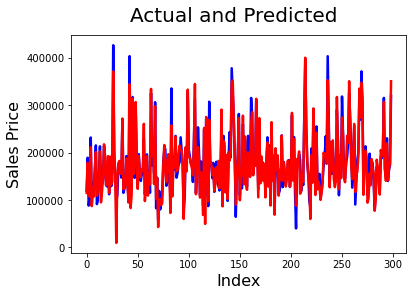

In [86]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

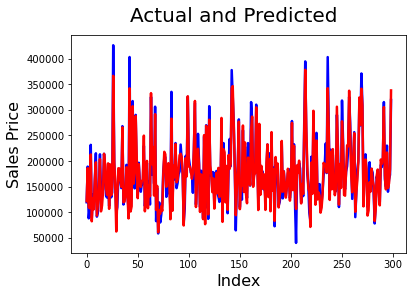

In [87]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

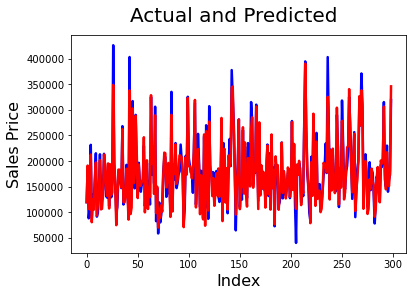

In [88]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

# The Ridge model and lasso model, both gave us the similar results, but Ridge was little better then Lasso. 